# LFM-隐因子模型

In [1]:
'''
评分矩阵分解
R = P * Q
损失函数：参考线性回归的最小二乘法（least squares），求导计算系数，这里p和q都是要变动的
使用交替最小二乘法(alternaing least squares, ALS)
损失函数涉及到矩阵求逆，使用梯度下降
'''

'\n评分矩阵分解\nR = P * Q\n损失函数：参考线性回归的最小二乘法（least squares），求导计算系数，这里p和q都是要变动的\n使用交替最小二乘法(alternaing least squares, ALS)\n损失函数涉及到矩阵求逆，使用梯度下降\n'

### 0.引入依赖

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.数据准备

In [5]:
#评分矩阵R， 0不代表评分是0，而是没有评分
R = np.array([[4,0,2,0,1],
            [1,2,3,0,0],
            [1,0,2,4,1],
            [5,0,3,0,2],
            [0,0,1,5,1],
            [0,3,2,4,1]])
R.shape

(6, 5)

### 2.算法的实现

In [57]:
"""
@输入参数：
R: m*n评分矩阵
K：隐特征向量维度
max_iter: 最大迭代次数
alpha:步长
lambda:正则化参数

@输出参数：
分解之后的P,Q
P: 分解后的用户特征矩阵m*k
Q：分级后的物品特征举证n*k
"""


#给定超参数
K = 2
max_iter = 5000
alpha = 0.0002
lamda = 0.004

#核心算法
def LFM_GradDesc(R, K=2, max_iter=300, alpha=0.0001, lamda=0.002):
    #基本维度参数定义
    M = len(R)
    N = len(R[0])
    
    #P,Q初始值，随机生成
    P = np.random.rand(M,K)
    Q = np.random.rand(N,K)
    Q = Q.T #转置
    
    cost_list = []
    
    #开始迭代
    for step in range(max_iter):
        
        # 对所有用户u，物品i, 使用als思想，梯度下降
        for u in range(M):
            for i in range(N):
                if R[u][i] > 0: # 评分为0表示没有评分
                    eui = np.dot(P[u,:], Q[:,i]) - R[u][i] #向量点乘，计算偏导
                    
                    #代入公式，按照梯度下降算法更新当前Pu, Qi
                    for k in range(K):
                        P[u][k] = P[u][k] - alpha *  (2 * eui * Q[k][i] + 2 * lamda * P[u][k])
                        Q[k][i] = Q[k][i] - alpha *  (2 * eui * P[u][k] + 2 * lamda * Q[k][i])
            
        
        # u,i遍历完成，所有特征向量更新完成，得到P,Q可以计算预测评分矩阵
        predR = np.dot(P,Q)
        
        #有了当前P和Q,计算当前损失函数
        cost = 0
        for u in range(M):
            for i in range(N):
                if R[u][i] > 0:
                    cost += (np.dot(P[u,:],Q[:,i]) - R[u][i]) ** 2 # 预测和实际的平方差
                    #加上正则化项
                    for k in range(K):
                        cost += lamda * (P[u][k] ** 2 + Q[k][i] ** 2)
        # 损失
        cost_list.append(cost)
        
        #临界值
        if cost < 0.0001: #收敛的话可以提前退出
            break
    
    Q = Q.T
    return P,Q,cost_list
    
    

### 3.测试

In [62]:
P,Q,cost_list = LFM_GradDesc(R, K=5, max_iter=5000, alpha=0.0001, lamda=0.002)

print(P)
print(Q)

[[ 0.4779257   0.85517944  0.27216953  0.99179952  1.36790979]
 [ 0.94433955  0.66029807  1.25039925 -0.15696858  0.47424952]
 [ 0.59544293  0.44056017  1.0456465  -0.04928926  0.82158917]
 [ 0.96905313  1.23078974  0.52220534  1.4753842   1.17350005]
 [-0.3242731   1.22083313  1.08718006  0.73135406  0.57509277]
 [ 0.58181835  0.12682264  0.74019933  0.96730504  1.03851265]]
[[ 0.31412036  1.05982391 -0.18180302  1.65375426  0.91750832]
 [ 0.88603843  0.52122633  0.64223139  0.99096558  0.78103635]
 [ 1.42174362  0.47173778  0.70283281  0.05372564  0.47607296]
 [ 0.48292794  1.44728462  1.70013347  0.84797035  1.50151102]
 [ 0.61114756  0.34943288  0.25128134  0.48636001  0.05151502]]


In [63]:
print(R)
print(np.dot(P,Q.T))

[[4 0 2 0 1]
 [1 2 3 0 0]
 [1 0 2 4 1]
 [5 0 3 0 2]
 [0 0 1 5 1]
 [0 3 2 4 1]]
[[3.90224587 3.09522486 1.97870787 4.82616446 1.2121416 ]
 [0.94465003 2.19878718 2.75026203 4.11651899 1.07015041]
 [1.13615783 2.02161093 2.17779902 3.89473996 0.79895301]
 [5.03050017 4.21411614 2.96331576 6.15020996 1.93155407]
 [2.73148702 2.22114816 1.19206429 4.94231835 0.88693587]
 [2.73512901 2.82667809 1.9536368  4.10254662 1.10984864]]


In [64]:
print(cost_list[:5])
print(cost_list[-5:])

[69.54486589605592, 69.41409467233318, 69.28345675621618, 69.15295240577694, 69.02258187894708]
[0.6643111640401461, 0.6641311450855587, 0.6639512428343377, 0.6637714571866792, 0.6635917880428839]


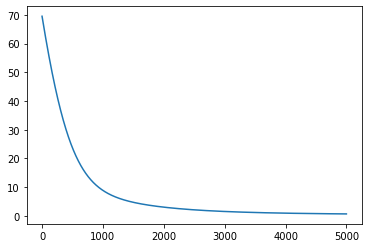

In [65]:
plt.plot(cost_list)